<a href="https://colab.research.google.com/github/EevaKR/Spring2024/blob/main/prostata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
#Loading and importing data
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/prostataData.csv')

#Installing all imports needes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

#VAIHEET MITÄ TULEE TEHDÄ!!!
#2.nd step: clean data, removing duplicates yms (tarviiko tehä??), remove irrelevant data
#ei tarvitse siivota dataa tai poistaa duplikaatteja eikä poistaa irrelevanttia dataa (voisiko joku sarake osoittautua myöhemmin irrelevantiksi),
#3RD, SPLIT THE DATA TO TRAINING/TEST SETS (tämä tehty jo valmiiksi)
#4TH CREATE A MODEL, valitse algoritmi, algoritmin valinta riippuu ongelmasta mitä yrittää ratkaista (tässä sci-kit learn)
#5th train our model
#6th make predictions
#7th evaluate and improve

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [241]:
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')


In [242]:
#CREATE PAIRS Visualizing relationships among variables, with pairs()

Data consists of a table of ten (10) variables:

lcavol: Logaritmi eturauhassyövän tilavuudesta (log-cancer volume)

lweight: Logaritmi eturauhasen painosta (log prostate weight)

age: Potilaan ikä vuosina

lbph: Logaritmi hyvänlaatuisesta eturauhasen liikakasvusta (log benign prostatic hyperplasia) /// Tarviiko tätä, mitä infoa antaa??

svi: Seminaarisen vesikkelin invaasio (seminal vesicle invasion). Eli lähettääkö tuumori noita vesikkeleitä eturauhasen ulkopuolelle.

lcp: Logaritmi siitä onko syöpä kasvanut eturauhasen seinämästä lävitse (log of capsular penetration)

gleason: Gleason-pistemäärä (Gleason score)

pgg45: Prosenttiosuus Gleason-pisteistä 4/5 (percent of Gleason scores 4/5), eli tämä tarkoittaa sitä et mitä ne aiemmat Gleasonit on ollu

lpsa: Logaritmi PSA:sta (Outcome. Log of PSA)

train: Tieto siitä, onko havainto harjoitusdatassa vai testidatassa (TRUE tai FALSE)




"When the pathologist’s report following radical prostatectomy describes seminal vesicle invasion (SVI), generally the outlook for the patient is poor"
"Invasion of the muscular wall of the seminal vesicles by prostate cancer is generally regarded as a marker of poor prognosis at the time of pathologic staging after radical prostatectomy."
Eli voisi olettaa että kun SVI on korkea, muutkin arvot olisivat korkeat, jos korkea svi johtaa korkeampaan mortaliteettiin."

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1476128/

In [243]:
#Tässä tulostan taulukon datasta ja sen otsikoista ja siitä mitkä ovat maksimi- ja minimiarvot kullakin sarakkeella
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')
pd.set_option('display.max_columns', 10)
df.head() #Tulostaa columnit

df.describe()

,Samples,age,svi,gleason,pgg45
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,63.865979,0.216495,6.752577,24.381443
std,28.145456,7.445117,0.413995,0.722134,28.204035
min,1.000000,41.000000,0.000000,6.000000,0.000000
25%,25.000000,60.000000,0.000000,6.000000,0.000000
50%,49.000000,65.000000,0.000000,7.000000,15.000000
75%,73.000000,68.000000,0.000000,7.000000,40.000000
max,97.000000,79.000000,1.000000,9.000000,100.000000


In [244]:
df

,Samples,lcavol,lweight,age,lbph,...,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818495,2.769459,50,-1.38629436,...,-1.38629436,6,0,-0.4307829,T
1,2,-0.994252273,3.319626,58,-1.38629436,...,-1.38629436,6,0,-0.1625189,T
2,3,-0.510825624,2.691243,74,-1.38629436,...,-1.38629436,7,20,-0.1625189,T
3,4,-1.203972804,3.282789,58,-1.38629436,...,-1.38629436,6,0,-0.1625189,T
4,5,0.751416089,3.432373,62,-1.38629436,...,-1.38629436,6,0,0.3715636,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830267834,3.876396,68,-1.38629436,...,1.32175584,7,60,4.3851468,T
93,94,3.821003607,3.896909,44,-1.38629436,...,2.16905370,7,40,4.6844434,T
94,95,2.907447359,3.396185,52,-1.38629436,...,2.46385324,7,10,5.1431245,F
95,96,2.882563575,3.773910,68,1.55814462,...,1.55814462,7,80,5.4775090,T


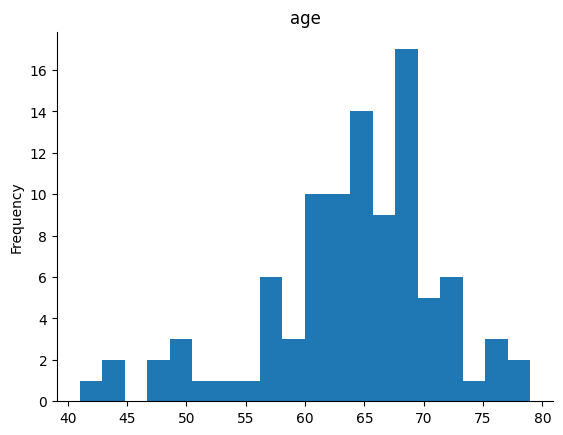

In [245]:
# @title Age chart of the patients

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

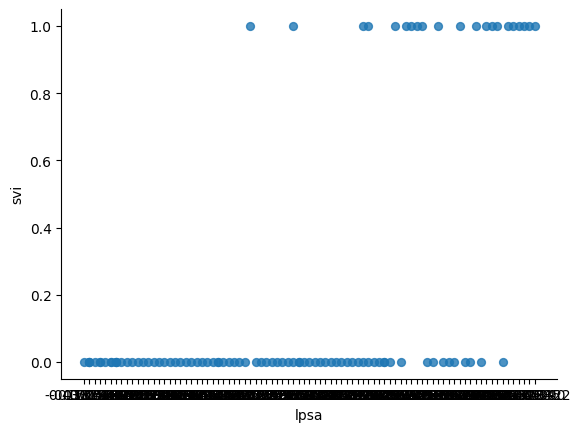

In [246]:
# @title Chart PSA vs. SVI (amount of vesicles)
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='lpsa', y='svi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
#tulos tästä on se että psa-arvo voi olla korkea myös SVI-arvolla 0, mutta se on pääosin korkea SVI-arvolla 1

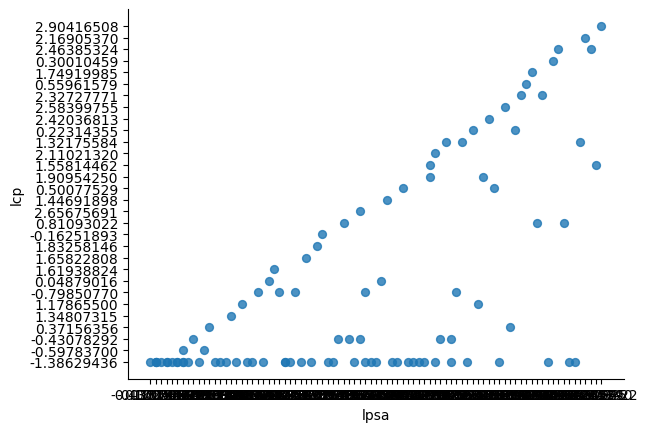

In [247]:
#Taulukko PSA vs. LCP (kapselin penetroituminen)
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')
df.plot(kind='scatter', x='lpsa', y='lcp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



Tässä taulukossa näkyy kapselin penetroituminen selkeässä yhteydessä korkeaan PSA-arvoon. Eli mitä suurempi kapselin penetroitumisarvo on, sitä korkeampi PSA-arvo potilaalla on. Selkeästi tarvittaisiin myös muitakin biomarkkereita kuin PSA-arvo, kun potilaalta tutkitaan mahdollista eturauhassyöpää. Tällä hetkellä Turun yliopistossa tutkitaan mm. vesikkeleiden asemaa biomarkkereina. https://www.utupub.fi/bitstream/handle/10024/149994/Takala_Aliisa_opinnayte.pdf?sequence=1&isAllowed=y

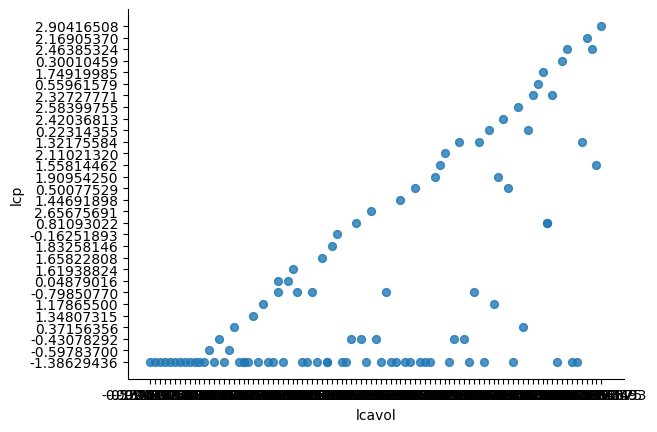

In [260]:
#Taulukko PSA vs. LCP (kapselin penetroituminen)
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')
df.plot(kind='scatter', x='lcavol', y='lcp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

LCAVOL eturauhasen tilavuus
LCP kapselin penetroituminen
Selkeä yhteys, mitä suurempi eturauhasen tilavuus, sitä suurempi kapselin penetroitumisarvo.

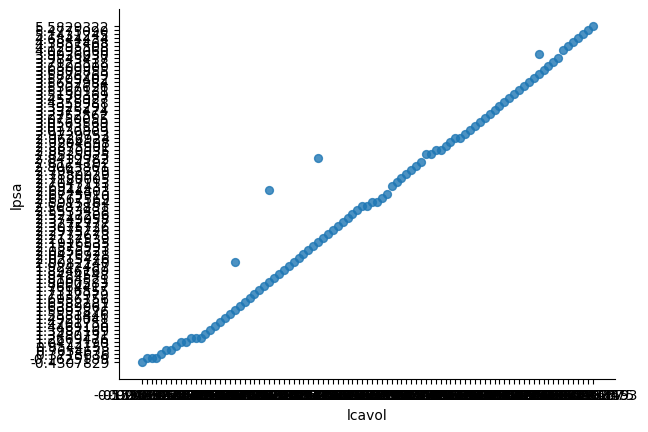

In [262]:
#Taulukko PSA vs. LCP (kapselin penetroituminen)
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')
df.plot(kind='scatter', y='lpsa', x='lcavol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Tässä kaaviossa näkyy selkeästi että eturauhasen tilavuus korreloi selkeästi PSA-arvon kanssa.

In [248]:
# Split data in train and test sets

train_data = df[df['train'] == 'T']
test_data = df[df['train'] == 'F']

print(df['train'].unique()) #Tulostetaan data mitä tuolta x_testista tulee

X_train = train_data.drop(columns=['lpsa'])
y_train = train_data['lpsa']
X_test = test_data.drop(columns=['lpsa'])
y_test = test_data['lpsa']


['T' 'F']


In [249]:
#Tulostetaan testi- ja train-datan määrä
print(len(X_test), len(y_train))


30 67


In [250]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

#Converting string to float
label_encoder = LabelEncoder()
df_encoded['train'] = label_encoder.fit_transform(df_encoded['train'])

train_data = df_encoded[df_encoded['train'] == 1]
test_data = df_encoded[df_encoded['train'] == 0]
#Tässä edelleen ongelmaa, train-columnin T ja F ei käänny 1:ksi ja 0:ksi

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Choosing and training the model
model = DecisionTreeClassifier() #Onko DecisionTreeClassifier järkevin malli tähäm dataan?
#model.fit(X_train, y_train) #Tämä rivi ei toimi koska "could not convert string to float"

#predictions = model.predict(X_test) #Tämä rivi ei toimi koska edellinen rivi ei toimi

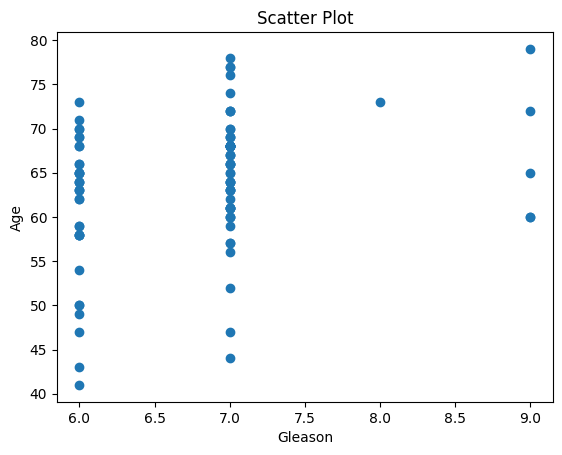

In [253]:
#Scatter plot arvoista Gleason ja Age
plt.scatter(df['gleason'], df['age'])
plt.title('Scatter Plot')
plt.xlabel('Gleason')
plt.ylabel('Age')
plt.show()

Eli tässä näkyisi että ikä korreloi Gleason-pisteiden kanssa, nuoremmilla potilailla tavattiin matalampia pisteitä kun taas iäkkäämmillä korkeampia.

In [254]:
#Onko tarpeellista?
seed = 15
df = pd.read_csv('/content/drive/My Drive/prostataData.csv', delimiter= ";", decimal=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Samples  97 non-null     int64 
 1   lcavol   97 non-null     object
 2   lweight  97 non-null     object
 3   age      97 non-null     int64 
 4   lbph     97 non-null     object
 5   svi      97 non-null     int64 
 6   lcp      97 non-null     object
 7   gleason  97 non-null     int64 
 8   pgg45    97 non-null     int64 
 9   lpsa     97 non-null     object
 10  train    97 non-null     object
dtypes: int64(5), object(6)
memory usage: 8.5+ KB


In [255]:
train_count = df['train'].value_counts()['T']
test_count = df['train'].value_counts()['F']

print("Number of train data:", train_count)
print("Number of test data:", test_count)

Number of train data: 67
Number of test data: 30


In [256]:
df.shape #Tässä tulostan kuinka monta riviä ja columnia on (rivit 97, sarakkeet 11)

(97, 11)

In [257]:
df.values

array([[1, '-0.579818495', '2.769459', ..., 0, '-0.4307829', 'T'],
       [2, '-0.994252273', '3.319626', ..., 0, '-0.1625189', 'T'],
       [3, '-0.510825624', '2.691243', ..., 20, '-0.1625189', 'T'],
       ...,
       [95, '2.907447359', '3.396185', ..., 10, '5.1431245', 'F'],
       [96, '2.882563575', '3.773910', ..., 80, '5.4775090', 'T'],
       [97, '3.471966453', '3.974998', ..., 20, '5.5829322', 'F']],
      dtype=object)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


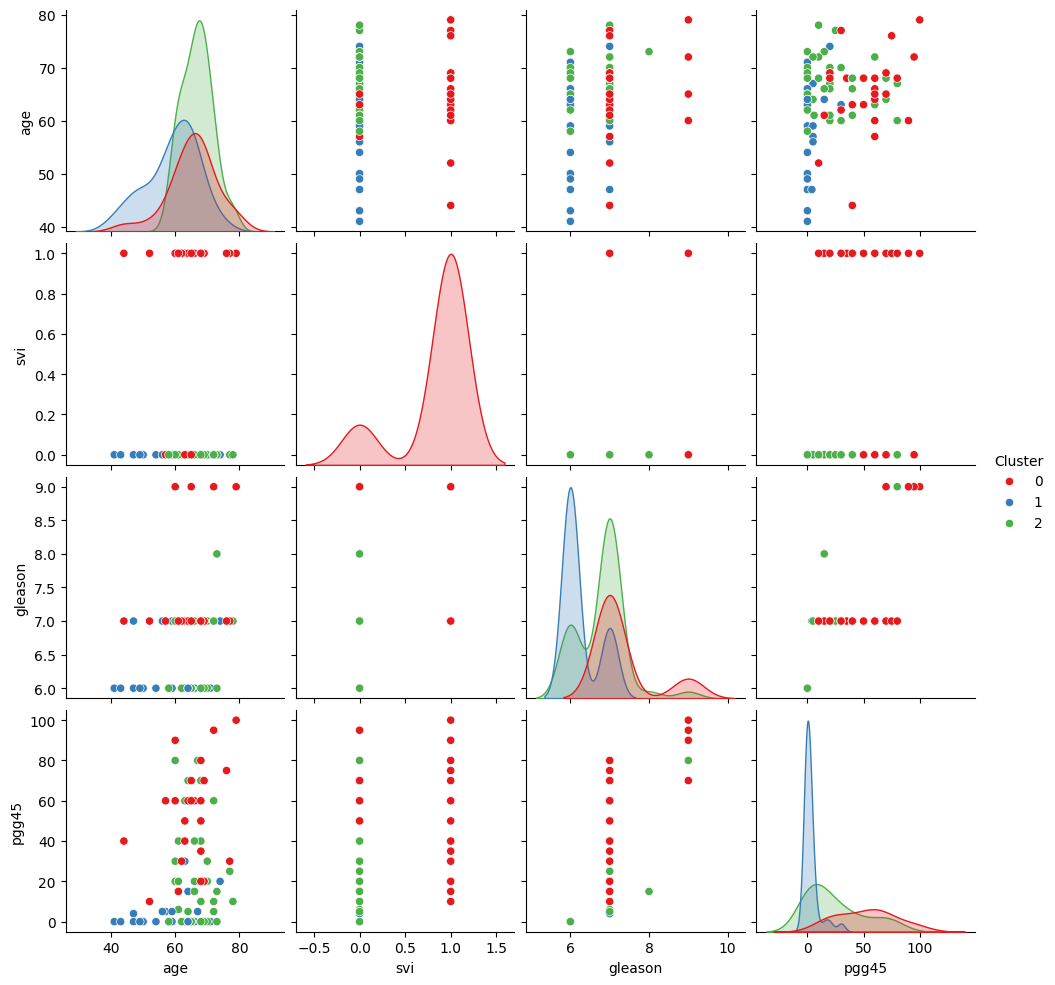

In [258]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#deleting columns that are not needed in clustering
df.drop(columns=['Samples', 'train'], inplace=True)

X = df.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# performing clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

df['Cluster'] = clusters

import seaborn as sns
sns.pairplot(df, hue='Cluster', palette='Set1')
plt.show()


Omia muistiinpanoja:
Having some data X1,…,Xp,Y
: the variables X1,…,Xp
 are called predictors, and Y
 is called a response.

Positing that Y|X1,…,Xp∼Pθ
, where θ
 represents some unknown parameters. This is called regression model for Y
 given X1,…,Xp
. Goal is to estimate parameters.
To assess model validity, predictor importance (inference)
To predict future Y
’s from future X1,…,Xp
’s (prediction)

LOOKING AT THE DATA:

What are the distributions of the variables?
Are there distinct subgroups of samples?
Are there any noticeable outliers?
Are there interesting relationship/trends to model?

svi, the presence of seminal vesicle invasion, is binary
lcp, the log amount of capsular penetration, is very skewed

When the actual capsular penetration is very small, it can’t be properly measured, so it just gets arbitrarily set to 0.25 (and we can check that min(pros.df$lcp) ≈log0.25
)
The variable pgg45 measures the percentage of 4 or 5 Gleason scores that were recorded over their visit history before their final current Gleason score, stored in gleason; a higher Gleason score is worse, so pgg45 tells us something about the severity of their cancer in the past